# <font color = maroon> Machine Learning Supervised Learning 1 Group Project</font>

**Group Members:**

Divangana Bansal 12120037

Karan Tyagi 12120012

Siddharth Maheshwari 12120058

Rahul Arora 12120036

Deeksha Sureka 12120094

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = maroon>Problem Statement(As given in the Rubric)</font>

An investment firm is looking for opportunities to invest on equities with a horizon of 3 months. The firm is interested to invest in companies in specific industry sector when the companies declare their quarterly results. 

They would like to understand if the investment would bring them a minimum expected return or not. So, they are planning to form a team of data scientists to analyse and build ML models to estimate the quarterly return on investment in a company based on the company performance indicators and the external industry and economic factors.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = maroon>Rationale in selecting the industry sector for investement</font>

A strong infrastructure is one of the backbone for the development of any country. In India, it is considered very
crucial in the economic growth and integrates large scale projects. The Indian central government has been prioritizing 
infrastructural development and it is expected to witness massive growth in the coming years. 

Looking at numbers published by India brand equity foundation (IBEF) in its Apr'2018 report,

**High budgetary allocation** 
The Government of India has given a massive push to the infrastructure sector by allocating Rs 5.97 lakh crore (US$ 92.22 billion) for the sector. 

**Rising infrastructure deals** 
The infrastructure sector in India witnessed 33 deals (worth US$ 3.49 billion) during FY 2016-17) with 4 PE deals worth US$ 666 million and 29 M&A deals worth US$ 2.82 billion. 

**Increasing private sector involvement**
Private sector is emerging as a key player across various infrastructure segments, ranging from roads and communications to power and airports. 

**Rising (FDI) in the sector** 
FDI   received   in   Construction   Development   sector   (townships, housing,   built   up   infrastructure   and construction development projects) from April 2000 to December 2017 stood at US$ 24.67 billion

**In our view, investors can look at infrastructure sector for long term wealth creation. Given the strong growth agenda,** 
**we have chosen infrastructure sector, to build ML models to estimate the quarterly return on investment on in a company's** 
**stock price, and recommend  as the potential investment avenue for investors**

**Report Reference**

https://www.ibef.org/download/Infrastructure-Report-April-2018.pdf







**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = maroon>Dataset Context, Description, and Preparation</font>

**Context**

We have referred to NSE infrastructure index that includes companies belonging to Telecom, Power, Port, Air, Roads, Railways, shipping and other Utility Services providers. The Index comprises of maximum 30 companies listed on National Stock Exchange of India (NSE).

NIFTY Infrastructure Index is computed using free float market capitalization method, wherein the level of the index reflects the total free float market value of all the stocks in the index relative to particular base market capitalization value.

**Given the 30 companies available in NIFTY infrastructure Index we have taken 20 companies for the use of model building**

**Compaines Name by their Ticker reference**

1. ACC
2. ADANIPORTS
3. AMBUJACEM
4. ASHOKLEY
5. BHARTIARTL
6. CONCOR
7. DLF
8. GAIL
9. GODREJPROP
10. GRASIM
11. INDUSTOWER
12. IOC
13. LT
14. MRF
15. NTPC
16. ONGC
17. RELIANCE
18. SIEMENS
19. TATAPOWER
20. ULTRACEMCO


**Time period**
The date prepared has been since Q1'2014 to Q4'2019 that consists of 24 quarters and spans through 6 years



**Attributes/Variables considered for the analysis**

There are total of 20 variables considered for the model building and analysis. The definitions for each variable is provide below:

**Meta Data - Time Period and Company name**

Variable 1: Quarter 
Variable 2: Ticker (Company scrip name used in stock market for trade)

**Internal Factors - Variables that reflects the company performanc**

Variable 3: Net Profit Margin % (Net Profit after tax/Net Sales)

Variable 4: Operating Margin % ((Total Operating Income - Operating Expenses)/Total Operating Income)

Variable 5: EPS (Direct Metric)

Variable 6: P/E Ratio (Share Price/ EPS)

Variable 7: ROE - Return on Equity (Net Profit/Total Shareholders Funds)

Variable 8: EBITDA Margin (P/L Before Int., Excpt. Items & Tax / Net Sales))

Variable 9: Debt-Equity Ratio (Long Term Borrowings + Short Term Borrowings)/Total Shargolder fund)

Variable 10: Current Ratio (Total Current Assets / Total Current Liabilities)

Variable 11: Working Capital Turnover [Revenue/(Current Assets - Current Liab)]

**External Factors - Variables that reflects the economic health**

Variable 12: USD-INR Exchange Rate

Variable 13: FDI:GDP %

Variable 14: GDP Growth %

Variable 15: Sectoral IIP

Variable 16: Sectoral IIP (Growth Rate)

Variable 17: Inflation%

Variable 18: Bank Repo Rate (Interest Rate)

**Ouctome: Variables that reflect the ouctome** 

Variable 19: Close price of given company at the end of each quarter

Variable 20:  Inter Quarter Gain %: (Current quarter close price - Previous quarter close price)/Previous quarter close price)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Data Extraction and Consolidation**

The data has been scraped from www.moneycontrol.com
The team wrote a scraper to scrape the financial results P&L and balance sheet, stock prices for each company 
The final data has been consolidated in excel and uploaded in python notebook for next steps

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = maroon>Key Objective</font>

**The high level objective of this assignment is to leverage ML technologies for data driven decision making. 
Through this assignment, we aim to build an ML model which will help investment firm in providing better consulations to its client by predicting Stock Gains for the future and help their client build strong Investment Portfolios.**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = maroon>Importing Necessary Libraries</font>

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import RFECV, SelectFromModel, RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.linear_model import LinearRegression, SGDRegressor , LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsRegressor ,  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, cross_validate
from sklearn.metrics import *
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings('ignore')

from joblib import dump

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = maroon>Loading Dataset</font>

In [114]:
# Reading the Dataset 

raw_df = pd.read_csv('Final_Data.csv')
raw_df.head()

,Quarter,Ticker,Net Profit Margin %,Operating Margin %,EPS (Basic),P/E Ratio,Return on Equity,EBITDA Margin %,Debt to Equity Ratio,Current Ratio,Working Capital Turnover,USD Exchange Rate,FDI:GDP %,GDP Growth %,Sectoral IIP,Sectoral IIP (Growth Rate),Inflation,Interest Rate,Next Quarter Adj Close,Inter Quarter Gain %
0,Q1-14,ACC.ns,7.977,52.329,12.95,99.846,2.921,11.617,0.0,0.967,-23.896,59.797,1.956,8.02,117.900,5.803,7.850,8.00,1278.477539,-0.11
1,Q2-14,ACC.ns,6.915,51.273,10.26,136.053,2.307,9.827,0.0,0.967,-21.775,60.606,2.088,8.70,114.733,5.389,6.675,8.00,1450.143066,13.43
2,Q3-14,ACC.ns,11.739,49.131,17.38,86.263,3.946,5.540,0.0,0.967,-21.937,61.933,1.797,5.92,116.600,8.836,4.051,8.00,1310.583862,-9.62
3,Q4-14,ACC.ns,8.038,54.796,12.60,123.845,2.754,17.231,0.0,0.899,-7.541,62.238,2.345,7.11,118.567,0.339,5.272,7.50,1170.287109,-10.70
4,Q1-15,ACC.ns,4.353,57.484,7.11,201.646,1.531,6.371,0.0,0.899,-7.739,63.471,2.663,7.59,120.467,2.177,5.092,7.25,1188.265259,1.54


In [115]:
# Understand the number of columns and rows in the dataset

raw_df.shape

(480, 20)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# <font color = maroon>Splitting Dataset</font>

In [116]:
# Splitting dataset into Train and Test data

test_df = raw_df[raw_df['Quarter'].str.contains('19')].reset_index(drop = True)
train_df = raw_df[~raw_df['Quarter'].str.contains('19')].reset_index(drop = True)

**Splitting Dataset based on the Quarter, Training Set contains 20 Quarters between 2014 to 2018 and Testing Set contains 4 quarters of 2019.**

### <font color = brown>1.1 Data Exploration</font>

In [117]:
# Checking for DataTypes and Null Values for all Features

In [118]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Quarter                     400 non-null    object 
 1   Ticker                      400 non-null    object 
 2   Net Profit Margin %         400 non-null    float64
 3   Operating Margin %          400 non-null    float64
 4   EPS (Basic)                 400 non-null    float64
 5   P/E Ratio                   400 non-null    float64
 6   Return on Equity            400 non-null    float64
 7   EBITDA Margin %             400 non-null    float64
 8   Debt to Equity Ratio        400 non-null    float64
 9   Current Ratio               400 non-null    float64
 10  Working Capital Turnover    400 non-null    float64
 11  USD Exchange Rate           400 non-null    float64
 12  FDI:GDP %                   400 non-null    float64
 13  GDP Growth %                400 non

In [119]:
# Checking for Multicollinearity using Heatmap

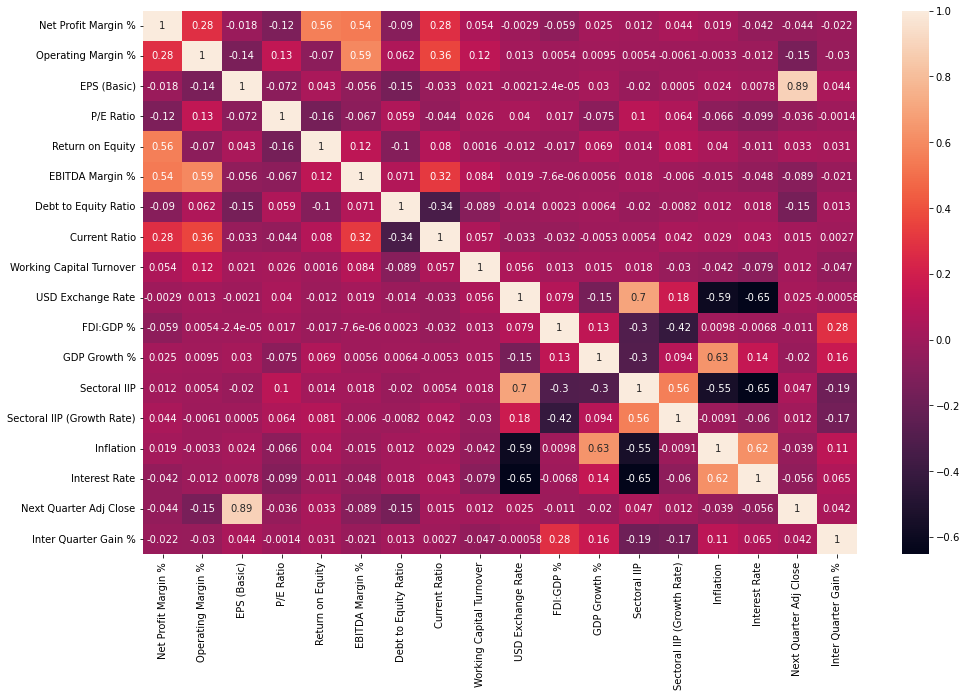

In [120]:
plt.figure(figsize = (16,10))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

**Interpretation**

By analyzing the heatmap, we can see multi collinearity in few attributes:

- Positive  Correlation 

  EPS & Next Quarter Adj Close, Inflation & GDP Growth, Inflation & Interest Rate, Sectoral IIP Index & Sectoral IIP growth     Rate, 
  
  
- Negative Correlation

  Inflation & USD Exchange Rate, Sectoral IIP & Interest Rate, Inflation & Sectorarl IIP
  

Open questions - To be removed, have we removed the variables with high multicollinearity)

In [121]:
# Understanding Significance and spread of stock price to check the skewness in data

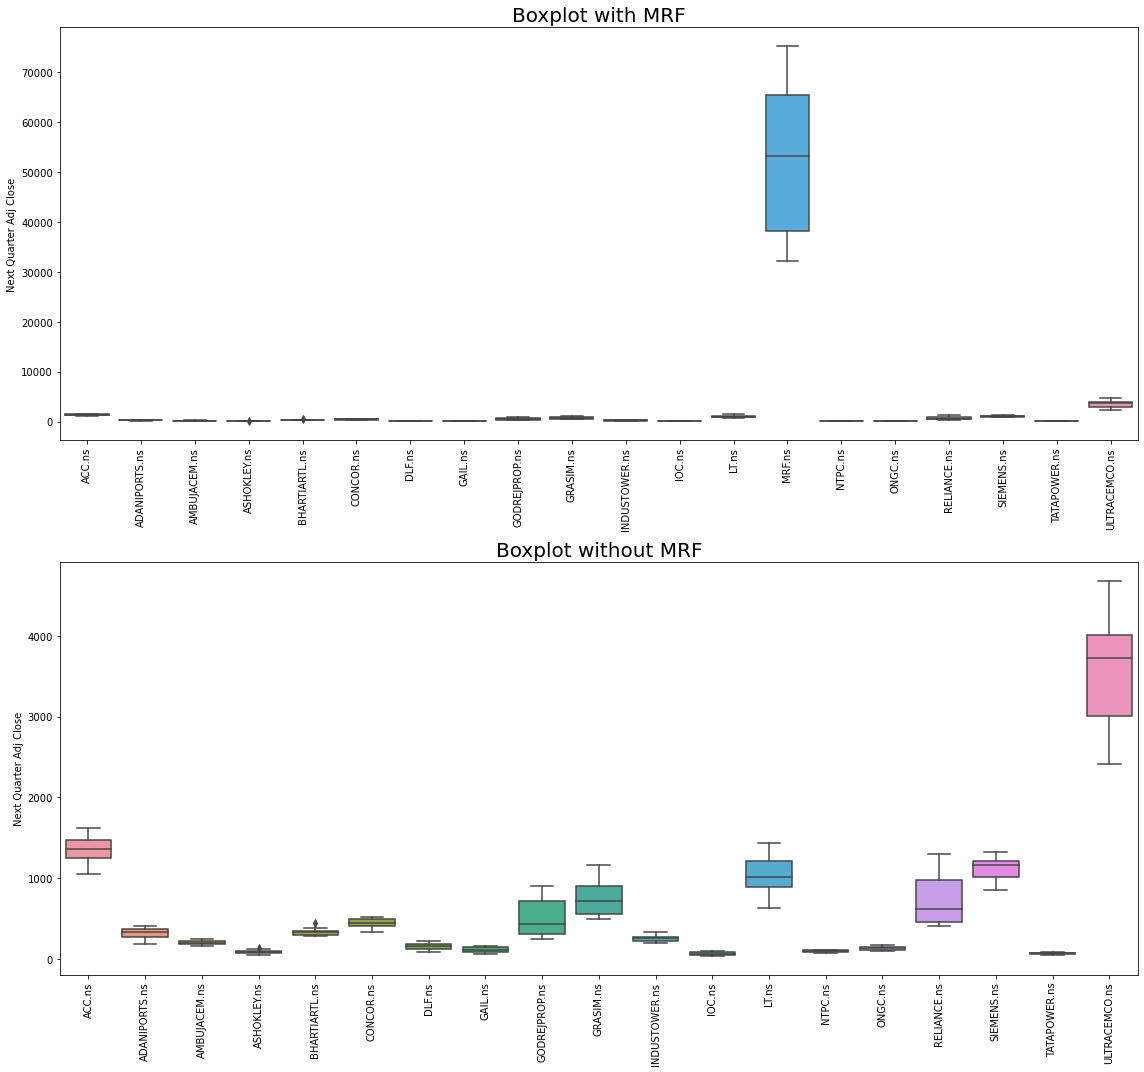

In [122]:
without_mrf = train_df[train_df['Ticker']!='MRF.ns']

plt.figure(figsize = (16,15))
plt.subplot(2,1,1)
sns.boxplot(train_df['Ticker'],train_df['Next Quarter Adj Close'])
plt.xticks(rotation = 90)
plt.title('Boxplot with MRF', fontsize = 20)
plt.xlabel("")

plt.subplot(2,1,2)
sns.boxplot(without_mrf['Ticker'],without_mrf['Next Quarter Adj Close'])
plt.xticks(rotation = 90)
plt.subplots_adjust(hspace=0.5)
plt.title('Boxplot without MRF', fontsize = 20)
plt.xlabel("")
plt.tight_layout()


plt.show()

**Interpretation**

From the figure titled "Boxplot with MRF", we can clearly interpret the following:
1. Out of all the companies, MRF has the widest range of prices i.e. 35K - 75K.
2. The ticker column as a categorical column looks significant since there are some companies whose prices are not overlapping at all.
3. MRF is also creating skewness in the overall distribution of stock prices because its price is way higher than rest of the companies.

From the figure titled "Boxplot without MRF", we can draw the following insights:
1. The stock price ranges b/w 1k to 4.5K 
2. The overall distribution of prices looks closer to normal distribition as compared to data with MRF. 

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = maroon> Part 1: Regression Modelling</font>

**Approach**

Step 1: Build a Base Model(OLS) with raw data

Step 2: Transforming Numerical and Categorical Columns using StandardScalar and OneHot Encoding.

Step 3: Removing Multocollinearity using Variance Inflation Factor Technique

Step 4: Applying different Regression Models

Step 5: Performing Error Analysis

### <font color = brown>1.1 Building the base model using OLS and interpreting the results</font>

In [123]:
# Defining the Dependent and independent variables in train dataset, Dependent as X, Independent as Y

X = train_df.drop(['Next Quarter Adj Close','Quarter','Ticker','Inter Quarter Gain %'],1)
y = train_df['Next Quarter Adj Close']

In [124]:
# Fitting the model and executing the results

base_model = sm.OLS(y,X).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Next Quarter Adj Close   R-squared (uncentered):                   0.815
Model:                                OLS   Adj. R-squared (uncentered):              0.808
Method:                     Least Squares   F-statistic:                              106.1
Date:                    Sun, 04 Sep 2022   Prob (F-statistic):                   6.29e-130
Time:                            17:15:36   Log-Likelihood:                         -3993.1
No. Observations:                     400   AIC:                                      8018.
Df Residuals:                         384   BIC:                                      8082.
Df Model:                              16                                                  
Covariance Type:                nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Net Profit Margin %          -15.9513     26.045     -0.612      0.541     -67.159      35.257
Operating Margin %            -7.9668     12.817     -0.622      0.535     -33.168      17.234
EPS (Basic)                   59.9908      1.567     38.279      0.000      56.909      63.072
P/E Ratio                      0.9543      1.182      0.807      0.420      -1.370       3.278
Return on Equity              46.7379    121.531      0.385      0.701    -192.212     285.688
EBITDA Margin %              -38.4833     28.418     -1.354      0.176     -94.358      17.391
Debt to Equity Ratio         256.5280    378.343      0.678      0.498    -487.355    1000.411
Current Ratio               1130.4573    388.631      2.909      0.004     366.346    1894.569
Working Capital Turnover      -2.0132      8.531     -0.236      0.814     -18.787      14.761
USD Exchange Rate           -252.9652    146.030     -1.732      0.084    -540.083      34.153
FDI:GDP %                    294.5086    577.313      0.510      0.610    -840.582    1429.600
GDP Growth %                  72.4036    344.226      0.210      0.834    -604.399     749.207
Sectoral IIP                 145.7790     59.019      2.470      0.014      29.738     261.820
Sectoral IIP (Growth Rate)   -94.9156     68.745     -1.381      0.168    -230.080      40.249
Inflation                   -288.5383    385.644     -0.748      0.455   -1046.776     469.699
Interest Rate               -233.0065    487.608     -0.478      0.633   -1191.723     725.710
==============================================================================
Omnibus:                      309.333   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18612.453
Skew:                           2.663   Prob(JB):                         0.00
Kurtosis:                      35.991   Cond. No.                         671.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation**

The adjusted r^2 (coefficient of determination) value in the OLS summary comes as 0.808 i.e. 80.8% which tells that 80.8% variation in stock prices can be explained by the interna/external factors. However, the variable expalainability seems insignificant as the p value for most of the co-efficients is greater than 5% so it is not signifcant enough to determine the factor explaining the stock price variation

Also, if we look at the Durban watson value score, its value is 0.345 that suggests there is high positive auto correlation as it is closer to 0. 

For reference, the Durbin-Watson statistic value ranges between 0 and 4. The value of 2 indicates there is no autocorrelation in the data. However, values from 0 to less than 2 point to positive autocorrelation and values from 2 to 4 means negative autocorrelation.

Hence, these two findings suggest to understand the multicollinearity in the dataset, remove such variables, apply various model techniques to see the best fit. 

### <font color = brown>1.2 Transforming Categorical and Numerical Columns</font>

In [125]:
num_xtr = X
cat_xtr = train_df[['Ticker']]

In [126]:
num_xte = test_df[X.columns]
cat_xte = test_df[['Ticker']]

In [127]:
# Applying the standard scaler to standardize the data 

sc = StandardScaler()
num_xtr1 = pd.DataFrame(sc.fit_transform(num_xtr))
num_xtr1.columns = num_xtr.columns

In [128]:
# Applying OneHot Encoding to the Categorical Column

ohe = OneHotEncoder(drop = 'first')
cat_xtr1 = ohe.fit_transform(cat_xtr)
cat_xte1 = ohe.transform(cat_xte)

In [129]:
cat_xtr1 = pd.DataFrame(cat_xtr1.toarray())
cat_xtr1.columns = ohe.get_feature_names()
cat_xte1 = pd.DataFrame(cat_xte1.toarray())
cat_xte1.columns = ohe.get_feature_names()

In [130]:
num_xte1 = pd.DataFrame(sc.transform(num_xte))
num_xte1.columns = num_xte.columns

In [131]:
X_tr = num_xtr1.join(cat_xtr1)
X_te = num_xte1.join(cat_xte1)

### <font color = brown>1.3 Feature Selection by excluding the features with high multicollinearity using Variance inflation factor (VIF method)</font>

In [132]:
# Applying the variance inflation factor (VIF) to check the amount of Multicollinearity among variables in the dataset

In [133]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_tr.columns
vif_data["VIF"] = [VIF(X_tr.values, i)
                          for i in range(len(X_tr.columns))]

In [134]:
vif_data.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
1,Operating Margin %,49.923668
28,x0_MRF.ns,16.956897
2,EPS (Basic),15.168096
6,Debt to Equity Ratio,14.830654
5,EBITDA Margin %,9.350356
23,x0_GODREJPROP.ns,8.620284
33,x0_TATAPOWER.ns,8.612446
20,x0_CONCOR.ns,8.250707
30,x0_ONGC.ns,8.060287
16,x0_ADANIPORTS.ns,7.373686


**Interpretation**

Looking at the values in VIF table above, we can see lot of variables having high variance inflation factor, operating margin% being the top with VIF of 49.92 which suggests that variables with high value have high multicollinearity with othe variables. 

So, we have taken all variables with VIF greater than 5 and analyzed their multicollinearity with other variables in the below heat map.


In [135]:
# Define the variable group with greater than 5 VIF

high_vif = vif_data[vif_data['VIF']>5]['Feature'].values

In [136]:
# Checking correlation of columns with High VIF

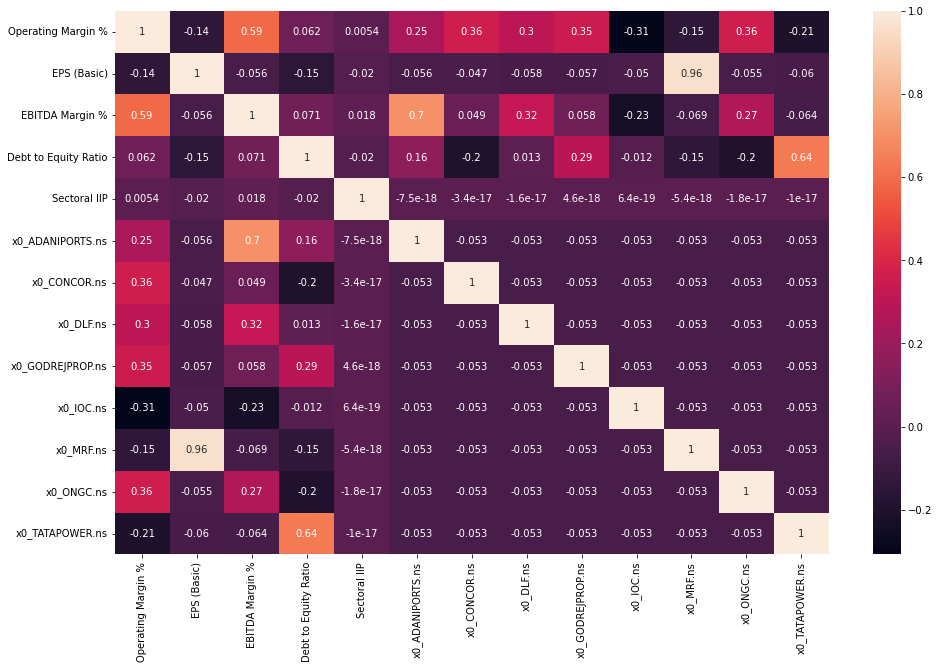

In [137]:
plt.figure(figsize = (16,10))
sns.heatmap(X_tr[high_vif].corr(),annot = True)
plt.show()

**Interpretation**

Based on the heatmap analysis, we will be removing 6 variables that has high correlation with one or more than one varaiables which are 

'Operating Margin %','Debt to Equity Ratio','Sectoral IIP','EBITDA Margin %','x0_MRF.ns'

In [138]:
cols_to_remove = ['Operating Margin %','Debt to Equity Ratio','Sectoral IIP','EBITDA Margin %','x0_MRF.ns']

In [139]:
X_tr.drop(cols_to_remove,1,inplace = True)
X_te.drop(cols_to_remove,1,inplace = True)

In [140]:
# Re-calculating the VIF values after removal of highly multicollinear variables

vif_data = pd.DataFrame()
vif_data["Feature"] = X_tr.columns
vif_data["VIF"] = [VIF(X_tr.values, i)
                          for i in range(len(X_tr.columns))]
vif_data

,Feature,VIF
0,Net Profit Margin %,2.366214
1,EPS (Basic),1.062360
2,P/E Ratio,1.435809
3,Return on Equity,2.062680
4,Current Ratio,2.654033
5,Working Capital Turnover,1.233895
6,USD Exchange Rate,2.187071
7,FDI:GDP %,1.348078
8,GDP Growth %,2.254863
9,Sectoral IIP (Growth Rate),1.400427


**Interpretation**

Based on the revised VIF table, we can see that all the variables have variance inflation factor of less than 5. Hence, this set of variable looks good to proceed with model building

We have used this data to apply the ML techniques and find the best fit model.

### <font color = brown>1.4 Building Machine Learning Models</font>

In [141]:
# Creating a data frame to store the r-squared and RMSE values for all models into a single table for inference purposes
Model_Performance = pd.DataFrame()
Model_Performance['Models'] = ['Linear Regression','KNN','Tune_KNN','Random Forest']
r2 = []
Adj_r2 = []
rmse = []

In [142]:
# Define Dependent variable for train and test dataset

y_tr = train_df['Next Quarter Adj Close']
y_te = test_df['Next Quarter Adj Close']

#### Linear Regression

In [143]:
# Fitting the model
lr = LinearRegression()
lr.fit(X_tr,y_tr)

LinearRegression()

In [144]:
pred_lr = lr.predict(X_te)

In [145]:
r2.append(r2_score(y_te,pred_lr))

In [146]:
Adj_r2.append(1 - (1-r2_score(y_te,pred_lr))**((80-1)/(80-30-1)))

In [147]:
rmse.append(np.sqrt(mean_squared_error(y_te,pred_lr)))

#### K Nearest Neighbors

In [148]:
# Fitting the model
knn = KNeighborsRegressor()
knn.fit(X_tr,y_tr)

KNeighborsRegressor()

In [149]:
pred_knn = knn.predict(X_te)

In [150]:
r2.append(r2_score(y_te,pred_knn))

In [151]:
Adj_r2.append(1 - (1-r2_score(y_te,pred_knn))**((80-1)/(80-30-1)))

In [152]:
rmse.append(np.sqrt(mean_squared_error(y_te,pred_knn)))


#### Tuning the KNN

In [153]:
params = {'n_neighbors': np.arange(2,50),'weights':['uniform','distance']}

In [154]:
gs = GridSearchCV(knn, params, scoring = 'r2')
gs.fit(X_tr,y_tr)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [155]:
gs.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [156]:
knn_tuned = KNeighborsRegressor(n_neighbors=gs.best_params_['n_neighbors'], weights=gs.best_params_['weights'])
knn_tuned.fit(X_tr,y_tr)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [157]:
pred_tuned_knn = knn_tuned.predict(X_te)

In [158]:
r2.append(r2_score(y_te,pred_tuned_knn))

In [159]:
Adj_r2.append(1 - (1-r2_score(y_te,pred_tuned_knn))**((80-1)/(80-30-1)))

In [160]:
rmse.append(np.sqrt(mean_squared_error(y_te,pred_tuned_knn)))

#### Random Forest

In [161]:
rf = RandomForestRegressor()
rf.fit(X_tr,y_tr)

RandomForestRegressor()

In [162]:
pred_rf = rf.predict(X_te)

In [163]:
r2.append(r2_score(y_te,pred_rf))

In [164]:
Adj_r2.append(1 - (1-r2_score(y_te,pred_rf))**((80-1)/(80-30-1)))

In [165]:
rmse.append(np.sqrt(mean_squared_error(y_te,pred_rf)))

In [166]:
Model_Performance['R2'] = r2
Model_Performance['Adj_r2'] = Adj_r2
Model_Performance['RMSE'] = rmse

In [167]:
Model_Performance

,Models,R2,Adj_r2,RMSE
0,Linear Regression,0.741530,0.887108,6760.909133
1,KNN,0.990876,0.999486,1270.287480
2,Tune_KNN,0.994020,0.999740,1028.397799
3,Random Forest,0.997076,0.999918,719.137291


In [168]:
results = pd.DataFrame()
results['Actual'] = y_te
results['Predicted'] = pred_tuned_knn
results['Residuals'] =  results['Predicted'] - results['Actual']
results['Previous Quarter Price'] = raw_df[raw_df['Quarter'].isin(['Q4-18','Q1-19','Q2-19','Q3-19'])]['Next Quarter Adj Close'].reset_index().drop('index',1)
results['Actual Gain %'] = round(((results['Actual'] - results['Previous Quarter Price'])/results['Previous Quarter Price'])*100,2)
results['Predicted Gain %'] = round(((results['Predicted'] - results['Previous Quarter Price'])/results['Previous Quarter Price'])*100,2)

In [169]:
results.head()

,Actual,Predicted,Residuals,Previous Quarter Price,Actual Gain %,Predicted Gain %
0,1430.791138,1263.844073,-166.947065,1428.629028,0.15,-11.53
1,1241.572998,2219.488363,977.915365,1430.791138,-13.22,55.12
2,1193.963013,1402.601969,208.638956,1241.572998,-3.83,12.97
3,1276.488159,2227.729010,951.240851,1193.963013,6.91,86.58
4,372.663330,277.140941,-95.522389,356.527496,4.53,-22.27


**Interpretation**

By looking at the r-squared and RMSE values, Random Forest has the highet r-squared of 0.99.6 i.e. 99.6% and lowest RMSE value of approx 800. 

However, As per the ask of assignment we have to find the best model between linear regression and KNN, We will consider Tuned KNN as our prediction model given it has the highest r-squared (0.994) and lowest RMSE (1028) among LR, KNN and Tune_KNN

Let's look at the Error analysis in the next section to understand what is causing the RMSE

### <font color = brown>1.5 Error Analysis</font>

In [170]:
Residuals_Data = test_df[['Ticker']].join(results['Residuals'])

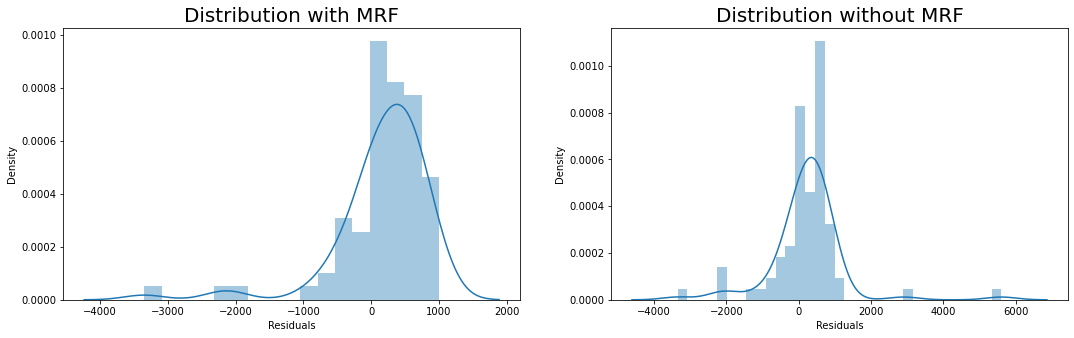

In [171]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.distplot(results['Residuals'])
plt.title('Distribution without MRF', fontsize = 20)
plt.subplot(1,2,1)
sns.distplot(Residuals_Data[Residuals_Data['Ticker']!='MRF.ns']['Residuals'])
plt.title('Distribution with MRF',fontsize = 20)
plt.show()

**Interpretation**

We can see the difference b/w with MRF and without MRF residuals distribution charts, the distribution with MRF chart has more skewness in the data because of MRF stock price that is in the range rs 30K to 75K compared to the rest of the companies stock price  ranges b/w rs 1K to 4.5K. 

Hence, it indicates that RMSE values in model results are primariliy driven by MRF stock price and the distribution is much better in the without MRF chart. 

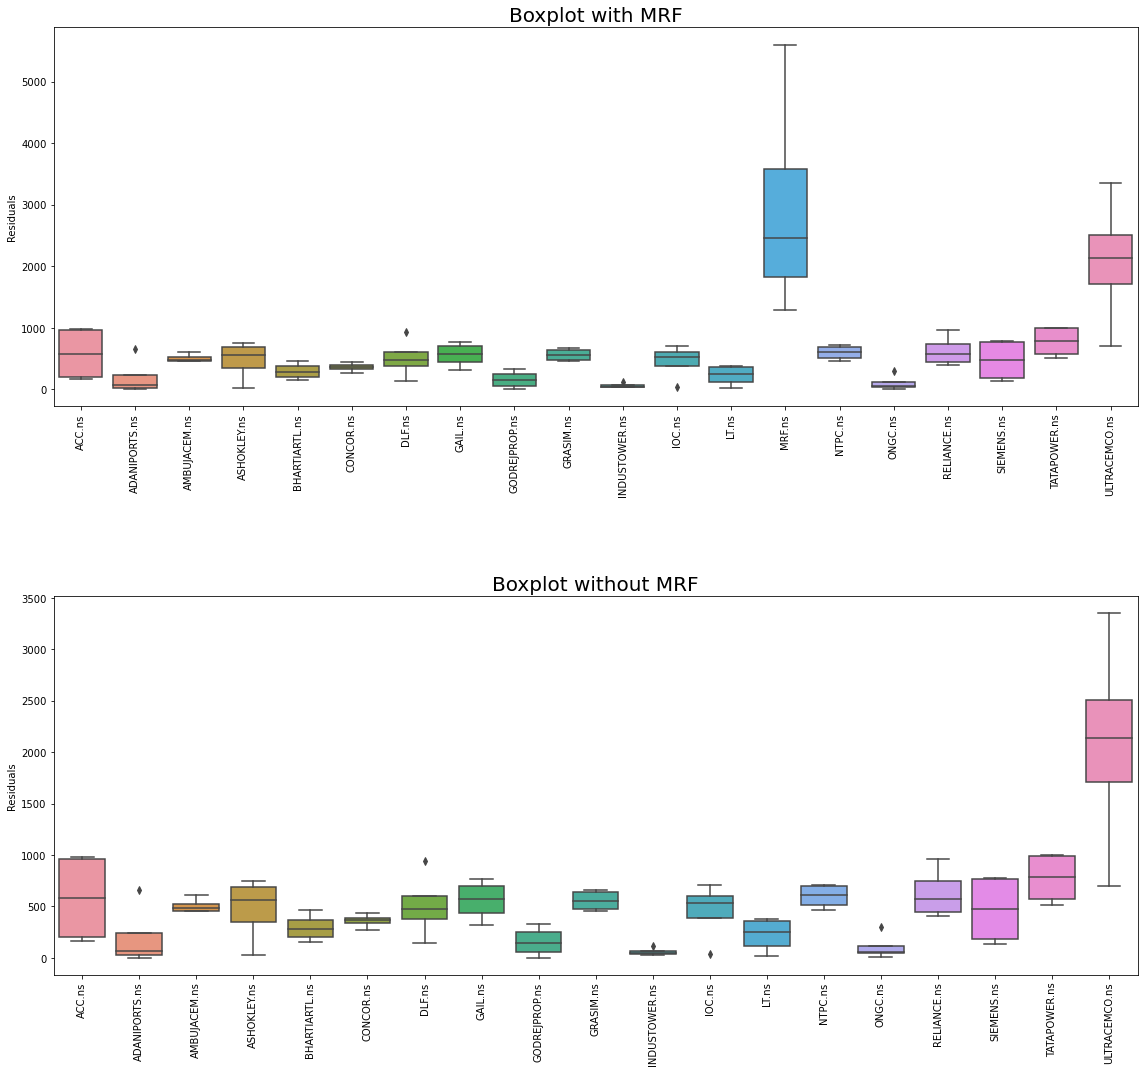

In [172]:
res_data_without_mrf = Residuals_Data[Residuals_Data['Ticker']!='MRF.ns']

plt.figure(figsize = (16,15))
plt.subplot(2,1,1)
sns.boxplot(x = Residuals_Data['Ticker'], y = np.abs(Residuals_Data['Residuals']))
plt.xticks(rotation  =90)
plt.tight_layout()
plt.xlabel("")
plt.title('Boxplot with MRF', fontsize = 20)


plt.subplot(2,1,2)
sns.boxplot(x = res_data_without_mrf['Ticker'], y = np.abs(res_data_without_mrf['Residuals']))
plt.xticks(rotation  =90)
plt.title('Boxplot without MRF', fontsize = 20)
plt.xlabel("")
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)


plt.show()

**Interpretation**

Similar to residual distribution charts, the company wise residuals box plot also depicts the same story, the RMSE level can be seen most in MRF, which  is major driver followed by UltraCem

Conclusively, the error anlaysis helps us understand the root cause of high RMSE levels. So, we can say that our model will be highly accurate for all the companies with the exception of MRF due to high variability in stock price movement over time plus high vaiability in stock price compares the stock prices for rest of the companies in the cohort. 


### <font color = brown>1.6 Saving Model for Future Deployment</font>

In [173]:
class StockPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [174]:
reg_model = StockPredictionModel(knn_tuned,list(X_tr.columns),
                                np.sqrt(mean_squared_error(y_te,pred_tuned_knn)))

In [175]:
# dump
dump(reg_model, './stock_predict_reg.pkl')

['./stock_predict_reg.pkl']

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = maroon>Part 2: Classification Modeling</font>

### <font color = brown>Creating Gain % Classifier :</font>

Definition: If Close Price Gain % is atleast 3%, it will belong to Class 1, otherwise it will be class 0

In [220]:
raw_df['Inter Quarter Gain % Classifier'] = raw_df['Inter Quarter Gain %'].apply(lambda x : 1 if x >= 3 else 0)

In [221]:
raw_df['Inter Quarter Gain % Classifier'].value_counts()

0    255
1    225
Name: Inter Quarter Gain % Classifier, dtype: int64

###### Class 0 contains almost 50% of the data while Class 1 contains almost 50% of the Data. Thus, there is  no class imbalance Issue in the dataset.

In [222]:
# Defining the test and train dataset

test = raw_df[raw_df['Quarter'].str.contains('19')]
train = raw_df[~raw_df['Quarter'].str.contains('19')]

Splitting Dataset based on the Quarter, Train will contain 20 Quarters between 2014 to 2018 and Test set will contain only 4 quarters of 2019.

### <font color = brown>**Checking Class Imbalance Issue in Train and Test**</font>

In [223]:
train['Inter Quarter Gain % Classifier'].value_counts()

0    209
1    191
Name: Inter Quarter Gain % Classifier, dtype: int64

In [224]:
test['Inter Quarter Gain % Classifier'].value_counts()

0    46
1    34
Name: Inter Quarter Gain % Classifier, dtype: int64

In [225]:
# Dropping the feature which are not part of train & test dataset

cols_drop = ['Ticker', 'Quarter','Next Quarter Adj Close', 'Inter Quarter Gain %','Inter Quarter Gain % Classifier']

In [226]:
# Defining the Dependent and independent as x and y for train and test dataset

xtrain = train.drop(cols_drop, 1)
ytrain = train['Inter Quarter Gain % Classifier']
xtest = test.drop(cols_drop, 1)
ytest = test['Inter Quarter Gain % Classifier']

### <font color = brown>Adding Pre-Processing Steps for KNN</font>

 Using 2 types of scaler, Min-Max Scaler and Standard Scaler. we will check which type of processing will give us better results

In [227]:
## Pre-Processing Scalers to be used

mm = MinMaxScaler()
ss = StandardScaler()

### <font color = brown>Classification Models that will be tested</font>

In [228]:
## The Below Mentioned Data Scaler is going to be tested.

processing = ["None","Min-Max","Standard Scalar"]

In [229]:
## The List of Classification Models that will be tested

clf1 = LogisticRegression(random_state = 100)
clf2 = DecisionTreeClassifier(random_state = 100)
clf3 = KNeighborsClassifier()
clf4 = SGDClassifier(random_state = 100)


In [230]:
## We will be Judging the Best Tune Model based on The Below Mentioned Scores Metric

selection_score = 'roc_auc'

**>> Hyperparameters per models that will be tuned**

In [231]:
# Initate the hyperparameters for each dictionary

param1 = {}
param1['classifier__class_weight'] = [None]
param1['classifier__penalty'] = ['none','l1', 'l2']
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__class_weight'] = [None]
param2['classifier__max_depth'] = range(4,10)
param2['classifier__criterion'] = ['gini', 'entropy']
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__n_neighbors'] = range(3,15)
param3['classifier__weights'] = ['uniform', 'distance']
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__class_weight'] = [None]
param4['classifier__penalty'] = [None,'l1', 'l2']
param4['classifier__eta0'] = np.linspace(0.01, 0.05, 10, endpoint = True)
param4['classifier'] = [clf4]




### <font color = brown>Pipeline for Tuning best Classification Model and its Hyper-Parameter</font>

In [232]:
model_pipeline = Pipeline([('classifier', clf1)])

params = [param1,param2,param3,param4]


**Doing Grid Search Cross Validation**

In [233]:
def Model_Tuning(x_train,y_train):

    best_model = []
    best_score= []
    Processing = []
    score_used = []
    param_1 = []
    param_2 = []
    param_3 = []


    for processed in processing:
        if processed == "None" : xtrain_use = x_train
        elif processed == "Min-Max" : xtrain_use = pd.DataFrame(mm.fit_transform(x_train),columns = x_train.columns)
        elif processed == "Standard Scalar" : xtrain_use = pd.DataFrame(ss.fit_transform(x_train),columns = x_train.columns)
        
        
    
        gs = GridSearchCV(model_pipeline, params,  cv=5, n_jobs=-1,
                      return_train_score = True,
                      scoring=selection_score)

        
        gs.fit(xtrain_use, y_train )
        model = str(list(gs.best_params_.values())[0])
        score_num = np.round(gs.best_score_,4)
        
        
        prm1 = str(list(gs.best_params_.keys())[1].replace('classifier__', '')) + " = " +str(list(gs.best_params_.values())[1])
        
        prm2 = str(list(gs.best_params_.keys())[2].replace('classifier__', '')) + " = " + str(list(gs.best_params_.values())[2])
        
        try :
                prm3 = str(list(gs.best_params_.keys())[3].replace('classifier__', '')) + " = " +str(list(gs.best_params_.values())[3]) 
                
        except :
                prm3 = ""
        
        best_model.append(model)
        best_score.append(score_num)
        Processing.append(processed)
        score_used.append(selection_score)
        param_1.append(prm1)
        param_2.append(prm2)
        param_3.append(prm3)

    df = pd.DataFrame(list(zip(score_used,Processing, best_score, best_model,param_1,param_2,param_3)), 
                  columns = ["Score Name",'Processing',"Score","Model","Parameter 1","Parameter 2","Parameter 3"])
    
    df.sort_values(['Score Name','Score'],ascending=False, inplace = True)
    
    return(df)

### <font color = brown>Finding Best Processing Step, Classifier and Hyper Parameters based on the Score Metrics</font>

##### >> Creating Function to find the Best Data Scaler,  Best Classifer and Best Classifiers hyperparameters by doing K-Fold Crosss validation on the different Scaled Data.

In [234]:
## Python Function for finding the Best Scaler.

def ProcessingScaler(data_frame,x):
    
    scale_str = data_frame.Processing[data_frame['Score Name'] == x].reset_index(drop = True)[0]
    if scale_str == 'None' : scale = None
    elif scale_str == 'Min-Max' : scale = mm
    elif scale_str == 'Standard Scaler' : scale = ss
   
    return(scale)


In [235]:
## Python Function for finding the Best Model Hyper-Parameters.

def Parameter(data_frame,x) :
    
    pram1 = data_frame['Parameter 1'][data_frame['Score Name'] == x].reset_index(drop = True)[0]
    pram2 = data_frame['Parameter 2'][data_frame['Score Name'] == x].reset_index(drop = True)[0]
    pram3 = data_frame['Parameter 3'][data_frame['Score Name'] == x].reset_index(drop = True)[0]
    
    class_weight = str(np.where(pram1.find('class_weight')>=0,pram1.partition(" = ")[2],""))

    if class_weight == 'None': class_weight =None 
    else : class_weight
    
    n_neighbors = int(np.where(class_weight == "",np.where(pram1.find('n_neighbors') >= 0,
                                                           pram1.partition(" = ")[2],"0"),'0'))
    
    
    penalty =  np.where(pram2.find('penalty')>=0,np.where(pram2.partition(" = ")[2]== None,None,
                                                          str(pram2.partition(" = ")[2])),"")
    
    if penalty == 'None': penalty =None 
    else : penalty
    
    criterion = str(np.where(penalty == "", np.where(pram2.find('criterion')>=0,pram2.partition(" = ")[2],''),''))

    weights = str(np.where(penalty == "", np.where(criterion == '' ,np.where(pram2.find('weights')>=0,
                                                                           pram2.partition(" = ")[2],""),""),""))

    max_depth = int(np.where(pram3.find('max_depth')>=0,pram3.partition(" = ")[2],"0"))
    
    eta0 = float(np.where(criterion == "", np.where(pram3.find('eta0')>=0,pram2.partition(" = ")[2],'0.0'),'0.0'))
     
     
    dictionary = {'class_weight' : class_weight,
                 'n_neighbors' : n_neighbors,
                 'penalty' : penalty,
                 'max_depth' : max_depth,
                 'weights' : weights,
                 'criterion' : criterion,
                 'eta0' : eta0}
    
    return(dictionary)

In [236]:
## Python Function for finding the Best tune Model with the inclusion of the Hyper Parameters.

def Classifier(data_frame,x):
    parameter = Parameter(data_frame,x)
    
    clf_str = data_frame.Model[data_frame['Score Name'] == x].reset_index(drop = True)[0]
    
    if clf_str.find('LogisticRegression') >= 0  : clf = LogisticRegression(random_state = 100,
                                                                           class_weight= parameter['class_weight'],
                                                                           penalty = parameter['penalty'])
        
    elif clf_str.find('DecisionTreeClassifier')>= 0 : clf = DecisionTreeClassifier(random_state = 100,
                                                                                  max_depth= parameter['max_depth'],
                                                                                  criterion= parameter['criterion'])
    
    elif clf_str.find('KNeighborsClassifier') >= 0 : clf = KNeighborsClassifier(n_neighbors= parameter['n_neighbors'],
                                                                               weights= parameter['weights'])
    
    elif clf_str.find('SGDClassifier') >= 0 : clf = SGDClassifier(random_state = 100,
                                                                  class_weight= parameter['class_weight'],
                                                                  penalty = parameter['penalty'],
                                                                 eta0 = parameter['eta0'])
    
    return(clf)
    
    

###### Running the Cross Validation by using the Above Mentioned Python Function on our Train Data Set----------

In [237]:
Best_Models = Model_Tuning(xtrain,ytrain)

In [238]:
Best_Models

,Score Name,Processing,Score,Model,Parameter 1,Parameter 2,Parameter 3
1,roc_auc,Min-Max,0.7353,"KNeighborsClassifier(n_neighbors=14, weights='...",n_neighbors = 14,weights = distance,
0,roc_auc,None,0.7128,"DecisionTreeClassifier(max_depth=4, random_sta...",class_weight = None,criterion = gini,max_depth = 4
2,roc_auc,Standard Scalar,0.7128,"DecisionTreeClassifier(max_depth=4, random_sta...",class_weight = None,criterion = gini,max_depth = 4


###### The Above Results Gives the Result of our Cross Validation : KNN  gives out the best ROC AUC Score (0.73) among all the Scaler - Tuned Classifier

###### Testing the Above Model on the Test Data to look if our Classifier is performing when we apply the same on unseen Dataset i.e Test Dataset

In [239]:
## Scaler
Scaler_use = ProcessingScaler(Best_Models,selection_score)
print('Preprocessing is being done by using : ',Scaler_use)
if Scaler_use == None : 
    xtrain_preprocess = xtrain
    xtest_preprocess = xtest
else :
    xtrain_preprocess = pd.DataFrame(Scaler_use.fit_transform(xtrain),columns = xtrain.columns)
    xtest_preprocess = pd.DataFrame(Scaler_use.fit_transform(xtest),columns = xtest.columns)

Preprocessing is being done by using :  MinMaxScaler()


In [240]:
# Define the model classifier to be use

clf_use = Classifier(Best_Models,selection_score)
clf_use.fit(xtrain_preprocess, ytrain)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [241]:
# predicting on test data 

clf_test_pred = pd.DataFrame( { 'Actual':  ytest,
                                'Predicted': clf_use.predict(xtest_preprocess) } )

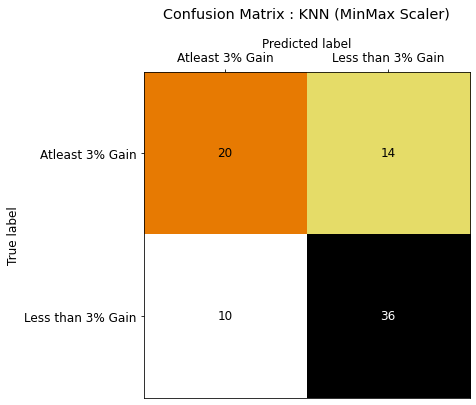

In [242]:
## Creating Confusion Matrix
cm = confusion_matrix( clf_test_pred.Actual,clf_test_pred.Predicted, labels = [1,0])

cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                 display_labels=['Atleast 3% Gain','Less than 3% Gain'])

fig, ax = plt.subplots(figsize=(6,6))

plt.rc('font', size= 12)

ax.set_title("Confusion Matrix : KNN (MinMax Scaler)",pad = 20)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

cm_plot.plot(ax=ax,cmap='CMRmap_r',colorbar = False)
plt.show()

 Classification Report :
                   precision    recall  f1-score   support

Less than 3% Gain       0.72      0.78      0.75        46
  Atleast 3% Gain       0.67      0.59      0.62        34

         accuracy                           0.70        80
        macro avg       0.69      0.69      0.69        80
     weighted avg       0.70      0.70      0.70        80



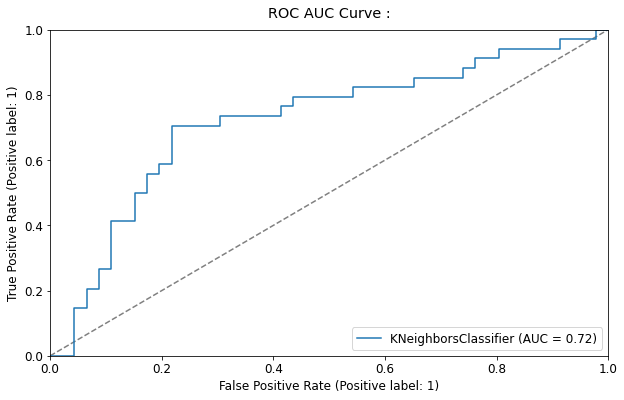

In [243]:
print( ' Classification Report :')
print(classification_report(clf_test_pred.Actual, clf_test_pred.Predicted,
                            target_names=['Less than 3% Gain', 'Atleast 3% Gain']))

fig, ax = plt.subplots(figsize=(10,6))
plt.title("ROC AUC Curve :", pad = 12)
plt.rc('font', size= 12)
plt.plot([0, 1], [0, 1],linestyle = 'dashed',color = 'gray')
plt.xlim([0, 1])
plt.ylim([0, 1])

roc = plot_roc_curve(clf_use,xtest_preprocess,ytest,ax = ax)

**Cost Analysis**

As per the Confusion Matrix above, we are considering Atleast 3% Gain as our Positive Class and based on that lets understand the differnt costs attached:
1. False Negative: This number reflects the class where the actual gain was atleast 3% but the model predicted less than 3%. This cell is actually an opportunity lost cost since the client could have invested in these stocks but because of model predictions they didn't.
If this values in on the higher side, the investment firm would lose portfolio value but may not lose clients.

2. False Positive: This number reflects the class where the actual gain was less than 3% but the model predicted alteast 3%. This cell is actual loss because the clients invested in these stocks but their gain was less than the expectation.
If this value is higher, the investment firm may lose its clients all together.


As per the above explanation, we'd try to maximize Recall and minimize False Negatives.



**Interpretation**

For Atleast 3% Gain, the Recall is 59% i.e. out of 100 Atleast 3% Gain quarters, we were able to recall just 59.

The ROC-AUC curve is able to tell us how well the model is able to distinguish the one class from other class. Since our AOC is 0.72 it means there is 70% chance that model is able to classify b/w one class to other class. SO, we can say our model will be able to accuartaly classiy the 72 classes out of 100 classes.

In [244]:
# Test data performance
print("Test F1 Score:",np.round(f1_score(ytest,clf_use.predict(xtest_preprocess))*100,3),"%")
print("Test Precision:",np.round(precision_score(ytest,clf_use.predict(xtest_preprocess))*100,3),"%")
print("Test Recall:",np.round(recall_score(ytest,clf_use.predict(xtest_preprocess))*100,3),"%")
print("Test ROC AUC Score:",np.round(roc_auc_score(ytest,clf_use.predict_proba(xtest_preprocess)[::,1])*100,3),"%")

Test F1 Score: 62.5 %
Test Precision: 66.667 %
Test Recall: 58.824 %
Test ROC AUC Score: 72.123 %


### <font color = brown>Feature Selection</font>

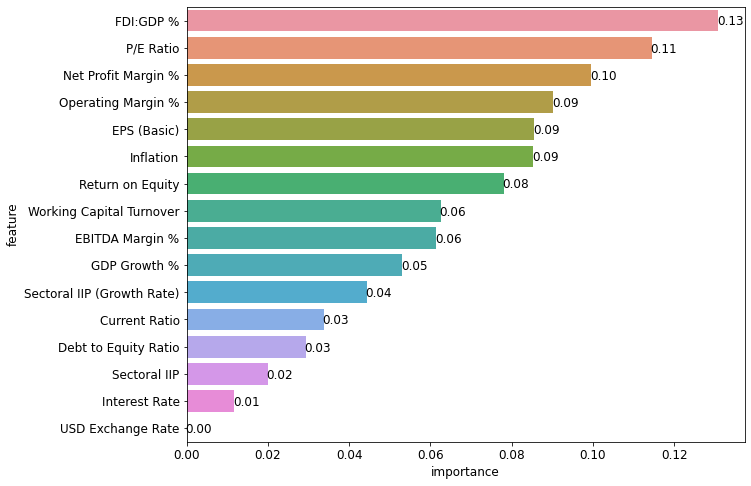

In [245]:
### Feature Importance Based on Decision Tree

tree = DecisionTreeClassifier(random_state = 100)
tree.fit(xtrain,ytrain)

ftr_imp = pd.DataFrame( {"feature": xtrain.columns, "importance": tree.feature_importances_} )

groupedvalues = ftr_imp.groupby('feature').sum().reset_index()

plt.figure( figsize = (10,8))

ax = sns.barplot( y = 'feature', x = 'importance', data = ftr_imp.sort_values("importance", ascending=False) )
for p in ax.patches:
    width = p.get_width()
    plt.text(0.003+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [246]:
remove_cols = ['Interest Rate','USD Exchange Rate','Sectoral IIP','Debt to Equity Ratio']

In [247]:
## Tuning the Model based on updated Features 

Best_Models = Model_Tuning(xtrain.drop(remove_cols,1),ytrain)
Best_Models

,Score Name,Processing,Score,Model,Parameter 1,Parameter 2,Parameter 3
0,roc_auc,None,0.7271,"DecisionTreeClassifier(criterion='entropy', ma...",class_weight = None,criterion = entropy,max_depth = 4
1,roc_auc,Min-Max,0.7271,"DecisionTreeClassifier(criterion='entropy', ma...",class_weight = None,criterion = entropy,max_depth = 4
2,roc_auc,Standard Scalar,0.7271,"DecisionTreeClassifier(criterion='entropy', ma...",class_weight = None,criterion = entropy,max_depth = 4


In [248]:
## Scaler
Scaler_use = ProcessingScaler(Best_Models,selection_score)
print('Preprocessing is being done by using : ',Scaler_use)
if Scaler_use == None : 
    xtrain_preprocess_ftr = xtrain.drop(remove_cols,1)
    xtest_preprocess_ftr = xtest.drop(remove_cols,1)
else :
    xtrain_preprocess_ftr = pd.DataFrame(Scaler_use.fit_transform(xtrain),columns = xtrain.columns)
    xtest_preprocess_ftr = pd.DataFrame(Scaler_use.fit_transform(xtest),columns = xtest.columns)

Preprocessing is being done by using :  None


In [249]:
clf_use_ftr = Classifier(Best_Models,selection_score)
clf_use_ftr.fit(xtrain_preprocess_ftr, ytrain)

clf_test_pred_ftr = pd.DataFrame( { 'Actual':  ytest,
                                'Predicted': clf_use_ftr.predict(xtest_preprocess_ftr) } )

In [250]:
clf_use_ftr

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=100)

### <font color = brown>Comparing Results for Pre and Post Feature Selection</font>

#### 1. Confusion Matrix

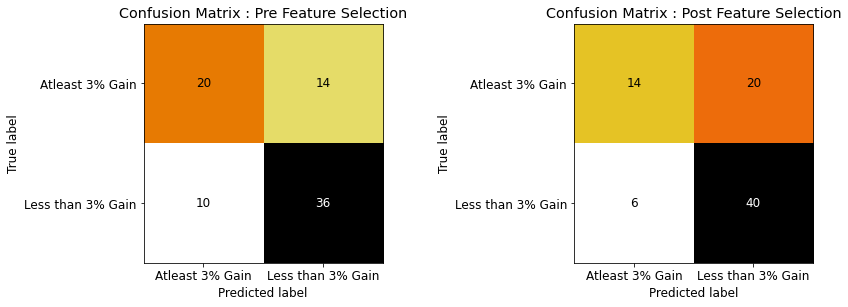

In [251]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 12))

## Confusion Matrix Pre Feature Selection :

cm = confusion_matrix(clf_test_pred.Actual, clf_test_pred.Predicted, labels = [1,0])

cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                 display_labels=['Atleast 3% Gain','Less than 3% Gain'])

## Confusion Matrix Post Feature Selection :

cm_ftr = confusion_matrix(clf_test_pred_ftr.Actual, clf_test_pred_ftr.Predicted, labels = [1,0])

cm_plot_ftr = ConfusionMatrixDisplay(confusion_matrix=cm_ftr, 
                                 display_labels=['Atleast 3% Gain','Less than 3% Gain'])



cm_plot.plot(ax=ax1,cmap='CMRmap_r',colorbar = False)
cm_plot_ftr.plot(ax=ax2,cmap='CMRmap_r',colorbar = False)

ax1.set_title('Confusion Matrix : Pre Feature Selection')
ax2.set_title('Confusion Matrix : Post Feature Selection')

plt.subplots_adjust(wspace=0.8)


#### 2. ROC AUC Curve

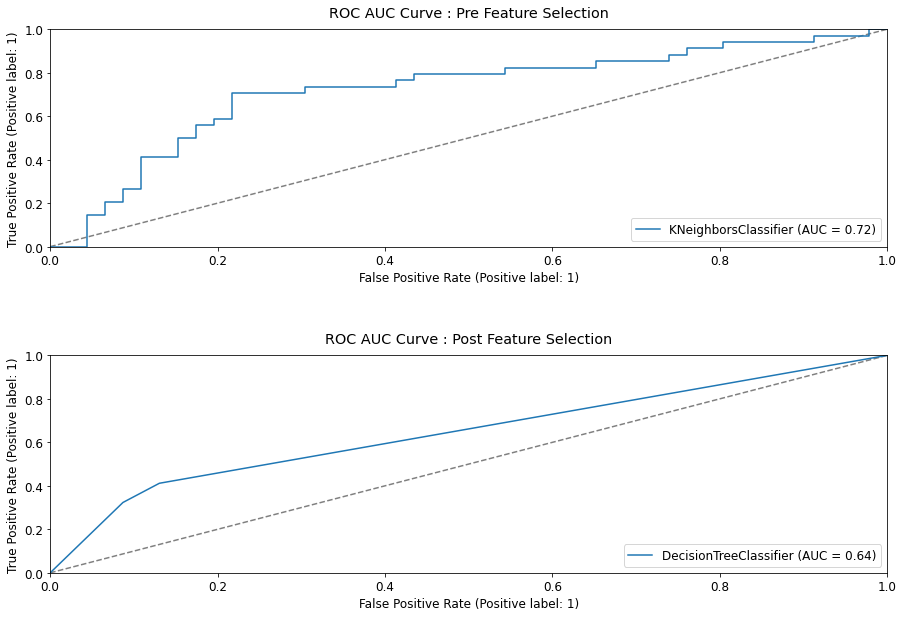

In [252]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(15, 10))

ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
## Confusion Matrix Pre Feature Selection :

ax1.set_title("ROC AUC Curve : Pre Feature Selection", pad = 12)
ax1.plot([0, 1], [0, 1],linestyle = 'dashed',color = 'gray')


roc = plot_roc_curve(clf_use,xtest_preprocess,ytest,ax = ax1)

## Confusion Matrix Post Feature Selection :

ax2.set_title("ROC AUC Curve : Post Feature Selection", pad = 12)
ax2.plot([0, 1], [0, 1],linestyle = 'dashed',color = 'gray')
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])

roc = plot_roc_curve(clf_use_ftr,xtest_preprocess_ftr,ytest,ax = ax2)

plt.subplots_adjust(hspace=0.5)


#### 3. Classification Report

In [253]:

print( ' Classification Report :Pre Feature Slection')
print(classification_report(clf_test_pred.Actual, clf_test_pred.Predicted,
                            target_names=['Less than 3% Gain', 'Atleast 3% Gain']))

print("")
print( ' Classification Report :Post Feature Slection')
print(classification_report(clf_test_pred_ftr.Actual, clf_test_pred_ftr.Predicted,
                            target_names=['Less than 3% Gain', 'Atleast 3% Gain']))



 Classification Report :Pre Feature Slection
                   precision    recall  f1-score   support

Less than 3% Gain       0.72      0.78      0.75        46
  Atleast 3% Gain       0.67      0.59      0.62        34

         accuracy                           0.70        80
        macro avg       0.69      0.69      0.69        80
     weighted avg       0.70      0.70      0.70        80


 Classification Report :Post Feature Slection
                   precision    recall  f1-score   support

Less than 3% Gain       0.67      0.87      0.75        46
  Atleast 3% Gain       0.70      0.41      0.52        34

         accuracy                           0.68        80
        macro avg       0.68      0.64      0.64        80
     weighted avg       0.68      0.68      0.65        80



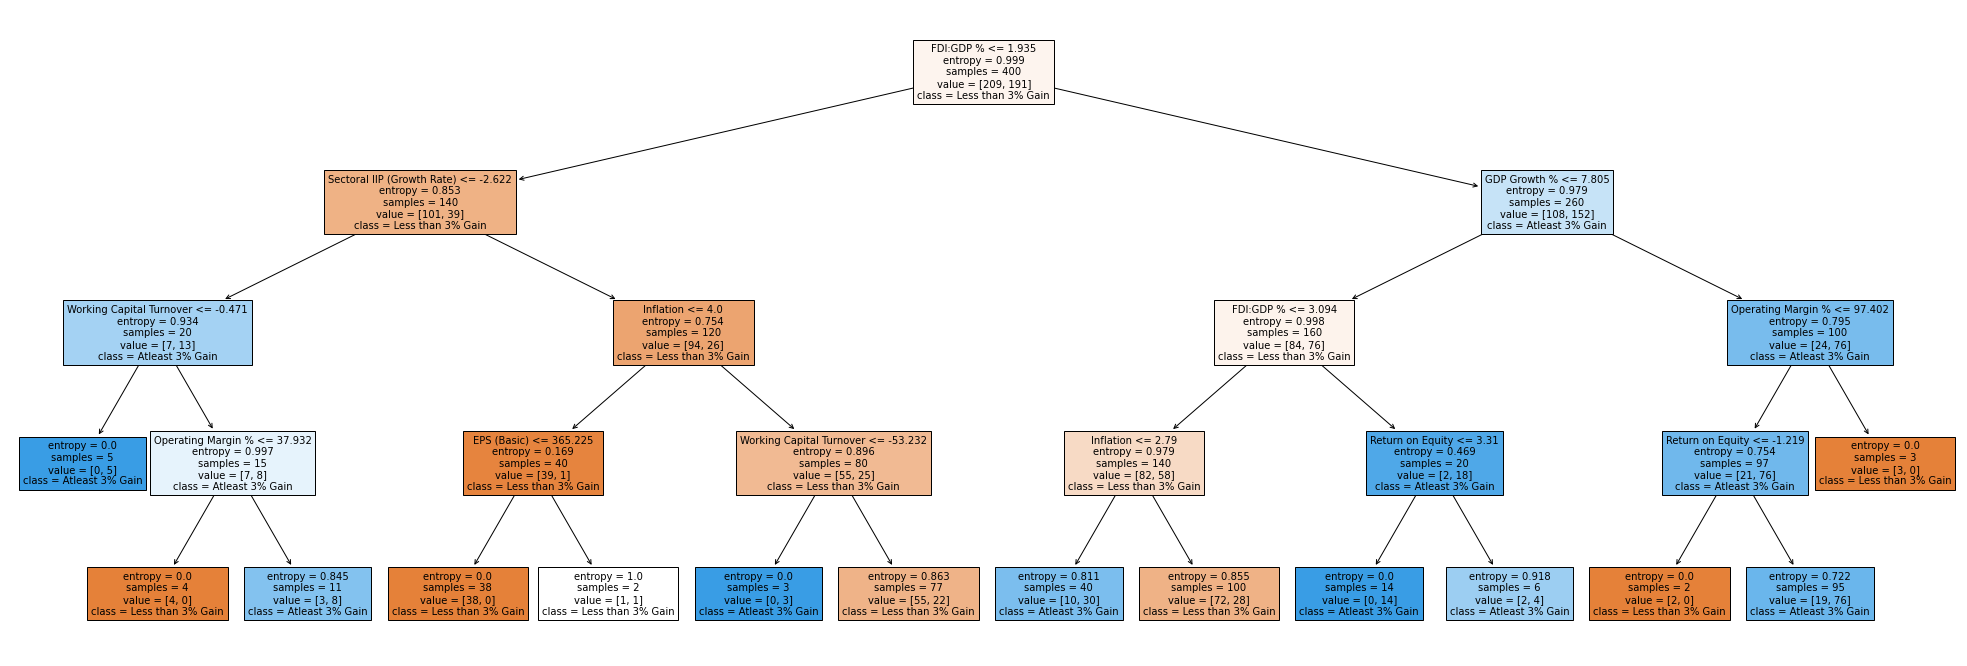

In [254]:
## Decision Tree Visualisation and Rules

plt.figure(figsize = (35, 12))

feature_columns = xtest_preprocess_ftr.columns

plot_tree(clf_use_ftr,
          feature_names = feature_columns,
          class_names = ['Less than 3% Gain', 'Atleast 3% Gain'],
          filled = True,
          fontsize = 10);
plt.savefig('tree.png')

**Interpretation**

IF FDI:GDP % is below 2% and if Sectoral IIP (Growth Rate) is below -2.6% and if Inflation is less than 4% and EPS (Basic) is less than Rs 365.22 then we then Gain % will be Less than 3%

IF FDI:GDP % is at least 2% and If GDP Growth % is less than 7.81% and if FDI :GDP % is greater than 3%  and if Return on Equity is greater than 3.31% then Gain % will be at least 3%

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = maroon>Accomplishments and Learnings</font>

**Accomplishments:**

1. Successful implementation of all the stages of an ML lifecycle.
2. Achieved 99.4% r-squared and 99.97% adjusted r-squared in Regression and 0.72 ROC-AUC in Classification.
3. Through this project, we have been able to do hands-on of all the concepts taugh in the MLSL course.


**Learnings:**

1. Learnt concepts related to Financial Markets.
2. Learnt the practical application of ML techniques
3. Learnt about end to end report preparation

**--------------------------------------------------------------------------------------------------THE END---------------------------------------------------------------------------------------------------**